<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Decision%20Trees/decision_tree_perfil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Eixo 1

In [ ]:
#eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P09", "P10", "P11", "P13", "P14", "P15", "P17", "P19", "P23", "P25", "perfil"])
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25", "perfil"])
eixo_1 = eixo_1.loc[0:103].reset_index(drop=True)
eixo_1

,P01,P04,P09,P10,P11,P13,P15,P17,P23,P25,perfil
0,5,3,2,4,4,X,3,2,3,3,quilombola
1,5,3,3,3,4,4,3,2,3,3,quilombola
2,5,4,2,3,3,3,3,3,5,3,quilombola
3,4,3,3,4,3,4,5,1,3,4,quilombola
4,5,3,3,4,3,3,4,1,3,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...
99,5,5,4,5,5,2,5,4,4,5,indigena
100,5,5,4,5,5,2,5,4,5,5,indigena
101,5,5,3,5,5,2,5,4,5,5,indigena
102,5,5,2,5,5,3,5,3,5,5,indigena


In [ ]:
eixo_1.replace('X', pd.NA, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_1.dropna(inplace=True)
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1

,P01,P04,P09,P10,P11,P13,P15,P17,P23,P25,perfil
0,5,3,3,3,4,4,3,2,3,3,quilombola
1,5,4,2,3,3,3,3,3,5,3,quilombola
2,4,3,3,4,3,4,5,1,3,4,quilombola
3,5,3,3,4,3,3,4,1,3,3,quilombola
4,4,3,3,3,3,4,3,3,3,3,quilombola
...,...,...,...,...,...,...,...,...,...,...,...
90,5,5,4,5,5,2,5,4,4,5,indigena
91,5,5,4,5,5,2,5,4,5,5,indigena
92,5,5,3,5,5,2,5,4,5,5,indigena
93,5,5,2,5,5,3,5,3,5,5,indigena


In [ ]:
X = eixo_1.drop("perfil", axis=1)
y = eixo_1["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=None,
                             random_state=1,
                             )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


### Avaliando

In [ ]:
#Numero de folhas
clf.get_n_leaves()

18

In [ ]:
#Profundidade
clf.get_depth()

6

### Visualizando

In [ ]:
column_names = X.columns
target_names = eixo_1['perfil'].unique()

In [ ]:
print(target_names)

['quilombola' 'indigena' 'pescador' 'urbano']


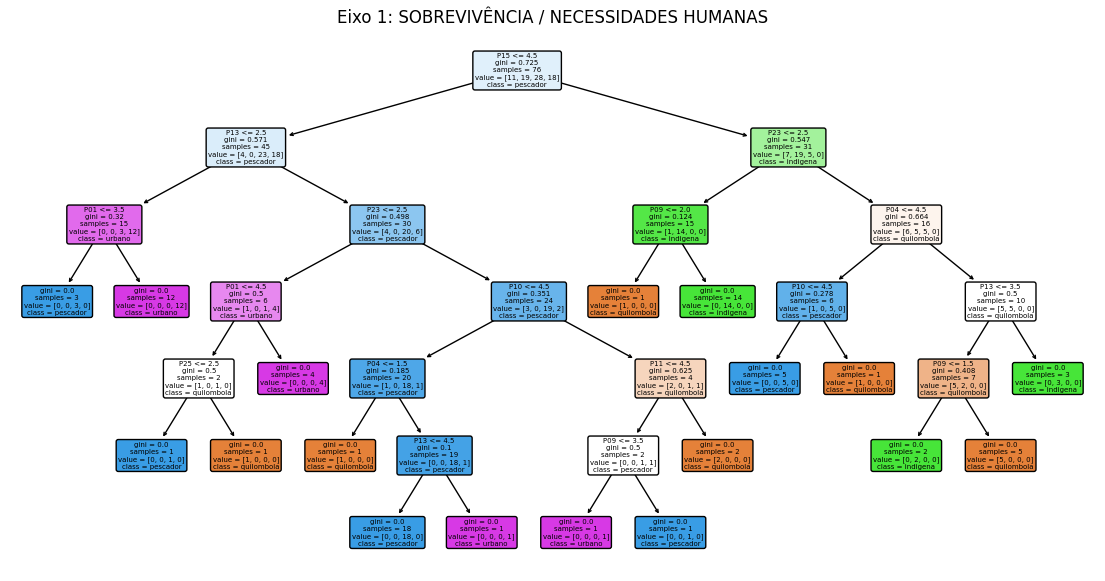

In [ ]:
plt.figure( figsize=(14,7),dpi=100)
plot_tree(clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.title("Eixo 1: SOBREVIVÊNCIA / NECESSIDADES HUMANAS")
plt.show()

In [ ]:
# Obter a representação textual da árvore
from sklearn.tree import export_text
features = ["P01", "P04", "P09", "P10", "P11", "P13", "P15", "P17", "P23", "P25"]
tree_text = export_text(clf, feature_names=features)
print(tree_text)

|--- P15 <= 4.50
|   |--- P13 <= 2.50
|   |   |--- P01 <= 3.50
|   |   |   |--- class: quilombola
|   |   |--- P01 >  3.50
|   |   |   |--- class: urbano
|   |--- P13 >  2.50
|   |   |--- P23 <= 2.50
|   |   |   |--- P01 <= 4.50
|   |   |   |   |--- P25 <= 2.50
|   |   |   |   |   |--- class: quilombola
|   |   |   |   |--- P25 >  2.50
|   |   |   |   |   |--- class: indigena
|   |   |   |--- P01 >  4.50
|   |   |   |   |--- class: urbano
|   |   |--- P23 >  2.50
|   |   |   |--- P10 <= 4.50
|   |   |   |   |--- P04 <= 1.50
|   |   |   |   |   |--- class: indigena
|   |   |   |   |--- P04 >  1.50
|   |   |   |   |   |--- P13 <= 4.50
|   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |   |--- P13 >  4.50
|   |   |   |   |   |   |--- class: urbano
|   |   |   |--- P10 >  4.50
|   |   |   |   |--- P11 <= 4.50
|   |   |   |   |   |--- P09 <= 3.50
|   |   |   |   |   |   |--- class: urbano
|   |   |   |   |   |--- P09 >  3.50
|   |   |   |   |   |   |--- class: quilombola
|   | 

## Eixo 2

In [ ]:
eixo_2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P30", "P33", "P34", "P36", "P37", "P39", "P40", "P41", "P44", "P47", "P50", "perfil"])
eixo_2 = eixo_2.loc[0:103].reset_index(drop=True)
eixo_2

,P30,P33,P34,P36,P37,P39,P40,P41,P44,P47,P50,perfil
0,4,3,4,3,5,3,3,3,5,3,3,quilombola
1,4,2,4,3,3,3,2,4,5,1,3,quilombola
2,3,2,4,3,4,3,3,3,5,1,2,quilombola
3,2,3,3,2,4,4,2,3,5,3,3,quilombola
4,3,3,5,3,1,3,3,3,5,3,1,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...
99,4,4,4,5,5,5,5,4,5,2,5,indigena
100,3,4,5,5,5,5,5,4,5,2,4,indigena
101,3,3,4,5,5,5,5,4,5,2,5,indigena
102,3,3,4,5,5,5,5,3,5,2,5,indigena


In [ ]:
eixo_2.replace('X', pd.NA, inplace=True)
eixo_2.dropna(inplace=True)
eixo_2 = eixo_2.reset_index()
eixo_2 = eixo_2.drop('index', axis=1)
eixo_2

,P30,P33,P34,P36,P37,P39,P40,P41,P44,P47,P50,perfil
0,4,3,4,3,5,3,3,3,5,3,3,quilombola
1,4,2,4,3,3,3,2,4,5,1,3,quilombola
2,3,2,4,3,4,3,3,3,5,1,2,quilombola
3,2,3,3,2,4,4,2,3,5,3,3,quilombola
4,3,3,5,3,1,3,3,3,5,3,1,quilombola
...,...,...,...,...,...,...,...,...,...,...,...,...
94,4,4,4,5,5,5,5,4,5,2,5,indigena
95,3,4,5,5,5,5,5,4,5,2,4,indigena
96,3,3,4,5,5,5,5,4,5,2,5,indigena
97,3,3,4,5,5,5,5,3,5,2,5,indigena


In [ ]:
X = eixo_2.drop("perfil", axis=1)
y = eixo_2["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=5,
                             random_state=1,
                             )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [ ]:
column_names = X.columns
target_names = eixo_2['perfil'].unique()

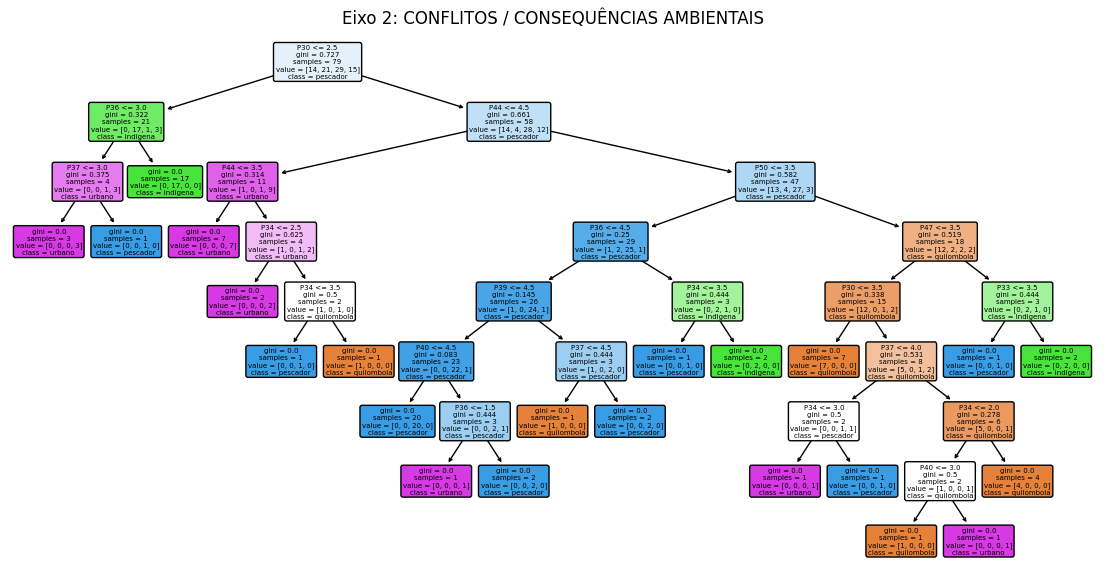

In [ ]:
plt.figure( figsize=(14,7),dpi=100)
plot_tree(clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.title("Eixo 2: CONFLITOS / CONSEQUÊNCIAS AMBIENTAIS")
plt.show()

In [ ]:
# Obter a representação textual da árvore
from sklearn.tree import export_text
features = ["P30", "P33", "P34", "P36", "P37", "P39", "P40", "P41", "P44", "P47", "P50"]
tree_text = export_text(clf, feature_names=features)
print(tree_text)

|--- P30 <= 2.50
|   |--- P36 <= 3.00
|   |   |--- P37 <= 3.00
|   |   |   |--- class: urbano
|   |   |--- P37 >  3.00
|   |   |   |--- class: quilombola
|   |--- P36 >  3.00
|   |   |--- class: pescador
|--- P30 >  2.50
|   |--- P44 <= 4.50
|   |   |--- P44 <= 3.50
|   |   |   |--- class: urbano
|   |   |--- P44 >  3.50
|   |   |   |--- P34 <= 2.50
|   |   |   |   |--- class: urbano
|   |   |   |--- P34 >  2.50
|   |   |   |   |--- P34 <= 3.50
|   |   |   |   |   |--- class: quilombola
|   |   |   |   |--- P34 >  3.50
|   |   |   |   |   |--- class: indigena
|   |--- P44 >  4.50
|   |   |--- P50 <= 3.50
|   |   |   |--- P36 <= 4.50
|   |   |   |   |--- P39 <= 4.50
|   |   |   |   |   |--- P40 <= 4.50
|   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |   |--- P40 >  4.50
|   |   |   |   |   |   |--- P36 <= 1.50
|   |   |   |   |   |   |   |--- class: urbano
|   |   |   |   |   |   |--- P36 >  1.50
|   |   |   |   |   |   |   |--- class: quilombola
|   |   |   |   |--- P39 

## Eixo 3

In [ ]:
eixo_3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Árvores/Comunidadesv4.xlsx").filter(["P52", "P56", "P59", "P66", "P68", "P69", "P73", "P74", "P75", "perfil"])
eixo_3 = eixo_3.loc[0:103].reset_index(drop=True)
eixo_3

,P52,P56,P59,P66,P68,P69,P73,P74,P75,perfil
0,3,3,3,3,3,3,3,2,4,quilombola
1,5,4,3,2,4,2,3,4,3,quilombola
2,3,3,2,2,2,2,3,3,2,quilombola
3,3,3,3,3,2,3,3,3,3,quilombola
4,5,5,3,3,5,5,5,5,3,quilombola
...,...,...,...,...,...,...,...,...,...,...
99,4,5,5,4,5,5,5,5,4,indigena
100,5,5,5,3,5,5,5,5,3,indigena
101,5,5,5,3,5,5,5,5,3,indigena
102,4,5,5,3,5,5,5,5,3,indigena


In [ ]:
eixo_3.replace('X', pd.NA, inplace=True)
#eixo_1.replace('x', pd.NA, inplace=True)
eixo_3.dropna(inplace=True)
eixo_3 = eixo_3.reset_index()
eixo_3 = eixo_3.drop('index', axis=1)
eixo_3

,P52,P56,P59,P66,P68,P69,P73,P74,P75,perfil
0,3,3,3,3,3,3,3,2,4,quilombola
1,5,4,3,2,4,2,3,4,3,quilombola
2,3,3,2,2,2,2,3,3,2,quilombola
3,3,3,3,3,2,3,3,3,3,quilombola
4,5,5,3,3,5,5,5,5,3,quilombola
...,...,...,...,...,...,...,...,...,...,...
94,4,5,5,4,5,5,5,5,4,indigena
95,5,5,5,3,5,5,5,5,3,indigena
96,5,5,5,3,5,5,5,5,3,indigena
97,4,5,5,3,5,5,5,5,3,indigena


In [ ]:
X = eixo_3.drop("perfil", axis=1)
y = eixo_3["perfil"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=None,
                             random_state=1,
                             )

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85


### Avaliando

In [ ]:
#Numero de folhas
clf.get_n_leaves()

24

In [ ]:
#Profundidade
clf.get_depth()

7

### Visualizando

In [ ]:
column_names = X.columns
target_names = eixo_1['perfil'].unique()

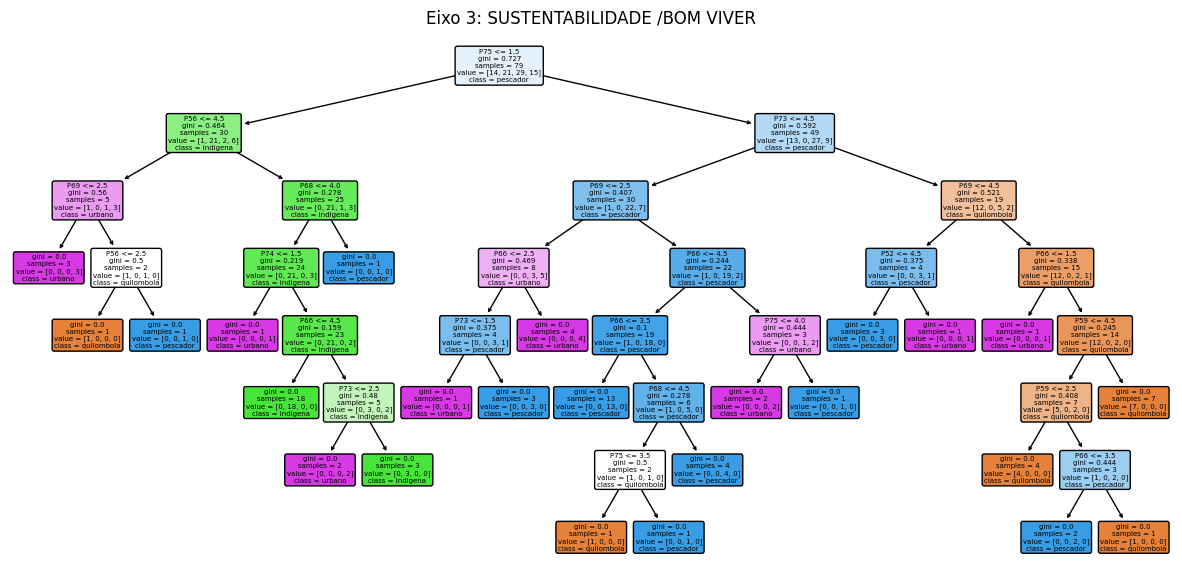

In [ ]:
plt.figure( figsize=(15,7),dpi=100)
plot_tree(clf,feature_names=column_names,
                      class_names=target_names,
                      filled=True, rounded=True,fontsize=5.0
                    )
plt.title("Eixo 3: SUSTENTABILIDADE /BOM VIVER")
plt.show()

In [ ]:
from sklearn.tree import export_text
features = ["P52", "P56", "P59", "P66", "P68", "P69", "P73", "P74", "P75"]
tree_text = export_text(clf, feature_names=features)
print(tree_text)

|--- P75 <= 1.50
|   |--- P56 <= 4.50
|   |   |--- P69 <= 2.50
|   |   |   |--- class: urbano
|   |   |--- P69 >  2.50
|   |   |   |--- P56 <= 2.50
|   |   |   |   |--- class: indigena
|   |   |   |--- P56 >  2.50
|   |   |   |   |--- class: quilombola
|   |--- P56 >  4.50
|   |   |--- P68 <= 4.00
|   |   |   |--- P74 <= 1.50
|   |   |   |   |--- class: urbano
|   |   |   |--- P74 >  1.50
|   |   |   |   |--- P66 <= 4.50
|   |   |   |   |   |--- class: pescador
|   |   |   |   |--- P66 >  4.50
|   |   |   |   |   |--- P73 <= 2.50
|   |   |   |   |   |   |--- class: urbano
|   |   |   |   |   |--- P73 >  2.50
|   |   |   |   |   |   |--- class: pescador
|   |   |--- P68 >  4.00
|   |   |   |--- class: quilombola
|--- P75 >  1.50
|   |--- P73 <= 4.50
|   |   |--- P69 <= 2.50
|   |   |   |--- P66 <= 2.50
|   |   |   |   |--- P73 <= 1.50
|   |   |   |   |   |--- class: urbano
|   |   |   |   |--- P73 >  1.50
|   |   |   |   |   |--- class: quilombola
|   |   |   |--- P66 >  2.50
|   |   | 